In [2]:
import wikipediaapi
import matplotlib.pyplot as plt
import networkx as nx
import re
import pandas as pd

# Cung cấp thông tin user agent
user_agent = "MyApp/1.0 (https://mywebsite.com; contact@example.com)"

# Khởi tạo đối tượng Wikipedia với ngôn ngữ 'en' và user agent
wiki_wiki = wikipediaapi.Wikipedia(language='en', user_agent=user_agent)

page = wiki_wiki.page("Tourism in Vietnam")

# Kiểm tra xem trang có tồn tại hay không
if page.exists():
    # In ra tiêu đề trang
    print(f"Title: {page.title}")

    # In ra phần tóm tắt nội dung
    print(f"Summary: {page.summary[0:500]}")  # Lấy 500 ký tự đầu tiên của phần tóm tắt

    # In ra toàn bộ nội dung trang
    print(page.text)
else:
    print("Trang không tồn tại")

Title: Tourism in Vietnam
Summary: Tourism in Vietnam is a component of the modern Vietnamese economy. In 2019, Vietnam received 18 million international arrivals, up from 2.1 million in the year 2000. The Vietnam National Administration of Tourism is following a long-term plan to diversify the tourism industry, which brings foreign exchange into the country.
Tourist arrivals in Vietnam have continued to rise in recent years. In 2008, Vietnam received 4.218 million international tourists, in 2009 the number was 3.8 million, down 
Tourism in Vietnam is a component of the modern Vietnamese economy. In 2019, Vietnam received 18 million international arrivals, up from 2.1 million in the year 2000. The Vietnam National Administration of Tourism is following a long-term plan to diversify the tourism industry, which brings foreign exchange into the country.
Tourist arrivals in Vietnam have continued to rise in recent years. In 2008, Vietnam received 4.218 million international tourists, in 20

In [3]:
from openie import StanfordOpenIE

In [4]:
page_text1 = page.text[:1000]

In [10]:
import json
# Đọc dữ liệu từ tệp JSON
with open('ground_truth.json', 'r', encoding='utf-8') as file:
    ground_truth = json.load(file)

# Kiểm tra nội dung của ground_truth
print(ground_truth)

[{'subject': 'Tourism in Vietnam', 'relation': 'is component of', 'object': 'modern economy'}, {'subject': 'Tourism in Vietnam', 'relation': 'is', 'object': 'component'}, {'subject': 'Vietnam', 'relation': 'is component of', 'object': 'economy'}, {'subject': 'Tourism', 'relation': 'is component of', 'object': 'modern Vietnamese economy'}, {'subject': 'Tourism', 'relation': 'is component of', 'object': 'Vietnamese economy'}, {'subject': 'Tourism', 'relation': 'is in', 'object': 'Vietnam'}, {'subject': 'Vietnam', 'relation': 'received', 'object': '18 million arrivals up'}, {'subject': 'Vietnam', 'relation': 'received In', 'object': '2019'}, {'subject': 'Vietnam', 'relation': 'received', 'object': '18 million international arrivals'}, {'subject': 'Vietnam', 'relation': 'received', 'object': '18 million international arrivals up'}, {'subject': 'Vietnam', 'relation': 'received', 'object': '18 million arrivals up from 2.1 million in year 2000'}, {'subject': 'Vietnam', 'relation': 'received',

Text: Barack Obama was born in Hawaii. Richard Manning wrote this sentence..
Starting server with command: java -Xmx8G -cp C:\Users\DINH THANG\.stanfordnlp_resources\stanford-corenlp-4.5.3/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 60000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-927211a5eb7c4037.props -preload openie
|- {'subject': 'Barack Obama', 'relation': 'was', 'object': 'born'}
|- {'subject': 'Barack Obama', 'relation': 'was born in', 'object': 'Hawaii'}
|- {'subject': 'Richard Manning', 'relation': 'wrote', 'object': 'sentence'}
Graph generated: graph.png.


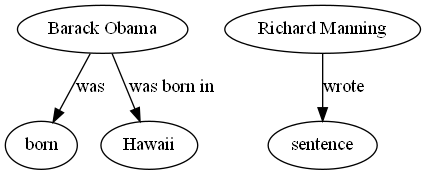

In [16]:
from openie import StanfordOpenIE
from IPython.display import Image, display

#Ví dụ
properties = {
    'openie.affinity_probability_cap': 2 / 3,
}
# test 1 câu xem kết quả
with StanfordOpenIE(properties=properties) as client:
    text = 'Barack Obama was born in Hawaii. Richard Manning wrote this sentence.'
    print('Text: %s.' % text)
    for triple in client.annotate(text):
        print('|-', triple)

    graph_image = 'graph.png'
    client.generate_graphviz_graph(text, graph_image)
    print('Graph generated: %s.' % graph_image)
    display(Image(filename=graph_image))

In [18]:
from openie import StanfordOpenIE
from IPython.display import Image, display

with StanfordOpenIE(properties=properties) as client:
    text1 = page_text1
    for triple in client.annotate(text1):
        print('|-', triple)

    graph_image = 'graph.png'
    client.generate_graphviz_graph(text1, graph_image)
    print('Graph generated: %s.' % graph_image)

Starting server with command: java -Xmx8G -cp C:\Users\DINH THANG\.stanfordnlp_resources\stanford-corenlp-4.5.3/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 60000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-4a58b7d420ca4965.props -preload openie
|- {'subject': 'Tourism', 'relation': 'is component of', 'object': 'modern economy'}
|- {'subject': 'Tourism', 'relation': 'is', 'object': 'component'}
|- {'subject': 'Tourism', 'relation': 'is component of', 'object': 'economy'}
|- {'subject': 'Tourism', 'relation': 'is component of', 'object': 'modern Vietnamese economy'}
|- {'subject': 'Tourism', 'relation': 'is component of', 'object': 'Vietnamese economy'}
|- {'subject': 'Tourism', 'relation': 'is in', 'object': 'Vietnam'}
|- {'subject': 'Vietnam', 'relation': 'received', 'object': '18 million arrivals up'}
|- {'subject': 'Vietnam', 'relation': 'received In', 'object': '2019'}
|- {'subject': 'Vietnam', 'relation': 'received', 'obje

In [20]:
with StanfordOpenIE(properties=properties) as client:
    extracted_data = []
    for triple in client.annotate(page_text1):
        extracted_data.append({
            "subject": triple['subject'],
            "relation": triple['relation'],
            "object": triple['object']
        })

# Chuyển đổi dữ liệu vào DataFrame
extracted_df = pd.DataFrame(extracted_data)
ground_truth_df = pd.DataFrame(ground_truth)

# Đếm số lượng triples trích xuất được
total_extracted = len(extracted_df)

# Đếm số lượng đúng
correct_extracted = 0
for _, extracted_row in extracted_df.iterrows():
    if any((extracted_row['subject'] == gt['subject'] and 
             extracted_row['relation'] == gt['relation'] and 
             extracted_row['object'] == gt['object']) for _, gt in ground_truth_df.iterrows()):
        correct_extracted += 1

# Tính số lượng triples trong ground truth
total_ground_truth = len(ground_truth_df)

# Tính độ chính xác và độ phủ
precision = correct_extracted / total_extracted if total_extracted > 0 else 0
recall = correct_extracted / total_ground_truth if total_ground_truth > 0 else 0

# In kết quả
print(f"Độ chính xác: {precision:.2f}")
print(f"Độ phủ: {recall:.2f}")

Starting server with command: java -Xmx8G -cp C:\Users\DINH THANG\.stanfordnlp_resources\stanford-corenlp-4.5.3/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 60000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-013473b84fdb451a.props -preload openie
Độ chính xác: 0.93
Độ phủ: 0.04
